## PREDICTING INCOME LEVELS USING MACHINE LEARNING MODELS

#### BUSINESS UNDERSTANDING
Income prediction is a crucial aspect for various stakeholders, including individuals, businesses, and policymakers. Accurate income predictions can help in financial planning, job market analysis, and economic forecasting. For businesses, understanding income levels can assist in targeting the right audience for products and services, optimizing pricing strategies, and improving employee compensation packages. The primary objective of this project is to develop a machine learning model that accurately predicts annual income based on wage per hour and total hours worked per year. The goal is to provide a reliable tool for stakeholders to make informed decisions regarding financial planning, hiring, and economic policies.

### Key Questions:
1. What are the primary factors influencing an individual's annual income?
Analyzing the impact of variables such as wage per hour, total hours worked, education level, and job type.

2. How accurately can we predict annual income using machine learning models?
Evaluating the performance of different machine learning algorithms in predicting income.

3. What insights can be derived from the data regarding employment patterns and income distribution?
Understanding trends and patterns in the data to provide actionable insights.

#### DATA UNDERSTANDING

#### Load the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Load the datasets

In [3]:
#Load the training dataset
train_df = pd.read_excel("Datasets/Train_Data.xlsx")

In [4]:
#Preview the train dataset
train_df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [5]:
#Load the test dataset
test_df = pd.read_excel("Datasets/Test_Data.xlsx")

In [6]:
#Preview test data
test_df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record
0,ID_TZ209499,54,Male,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3388.96
1,ID_TZ209500,53,Male,5th or 6th grade,Private,NaN,Married-civilian spouse present,White,Central or South American,Full-time schedules,...,El-Salvador,El-Salvador,?,?,?,?,NaN,NaN,NaN,1177.55
2,ID_TZ209501,42,Male,Bachelors degree(BA AB BS),Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,US,?,?,?,?,NaN,NaN,NaN,4898.55
3,ID_TZ209502,16,Female,9th grade,NaN,High school,Never married,White,All other,Children or Armed Forces,...,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1391.44
4,ID_TZ209503,16,Male,9th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,US,?,?,?,?,NaN,NaN,NaN,1933.18


In [ ]:
#Check cell values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [10]:
#Check for column names
train_df.columns

Index(['ID', 'age', 'gender', 'education', 'class', 'education_institute',
       'marital_status', 'race', 'is_hispanic', 'employment_commitment',
       'unemployment_reason', 'employment_stat', 'wage_per_hour',
       'is_labor_union', 'working_week_per_year', 'industry_code',
       'industry_code_main', 'occupation_code', 'occupation_code_main',
       'total_employed', 'household_stat', 'household_summary',
       'under_18_family', 'veterans_admin_questionnaire', 'vet_benefit',
       'tax_status', 'gains', 'losses', 'stocks_status', 'citizenship',
       'mig_year', 'country_of_birth_own', 'country_of_birth_father',
       'country_of_birth_mother', 'migration_code_change_in_msa',
       'migration_prev_sunbelt', 'migration_code_move_within_reg',
       'migration_code_change_in_reg', 'residence_1_year_ago',
       'old_residence_reg', 'old_residence_state', 'importance_of_record',
       'income_above_limit'],
      dtype='object')

In [11]:
#Check for duplicates
train_df.duplicated().sum()

np.int64(0)

* This shows there are no duplicates in the dataset

In [12]:
#Check missing values
train_df.isna().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

* This shows there are missing values in the dataset

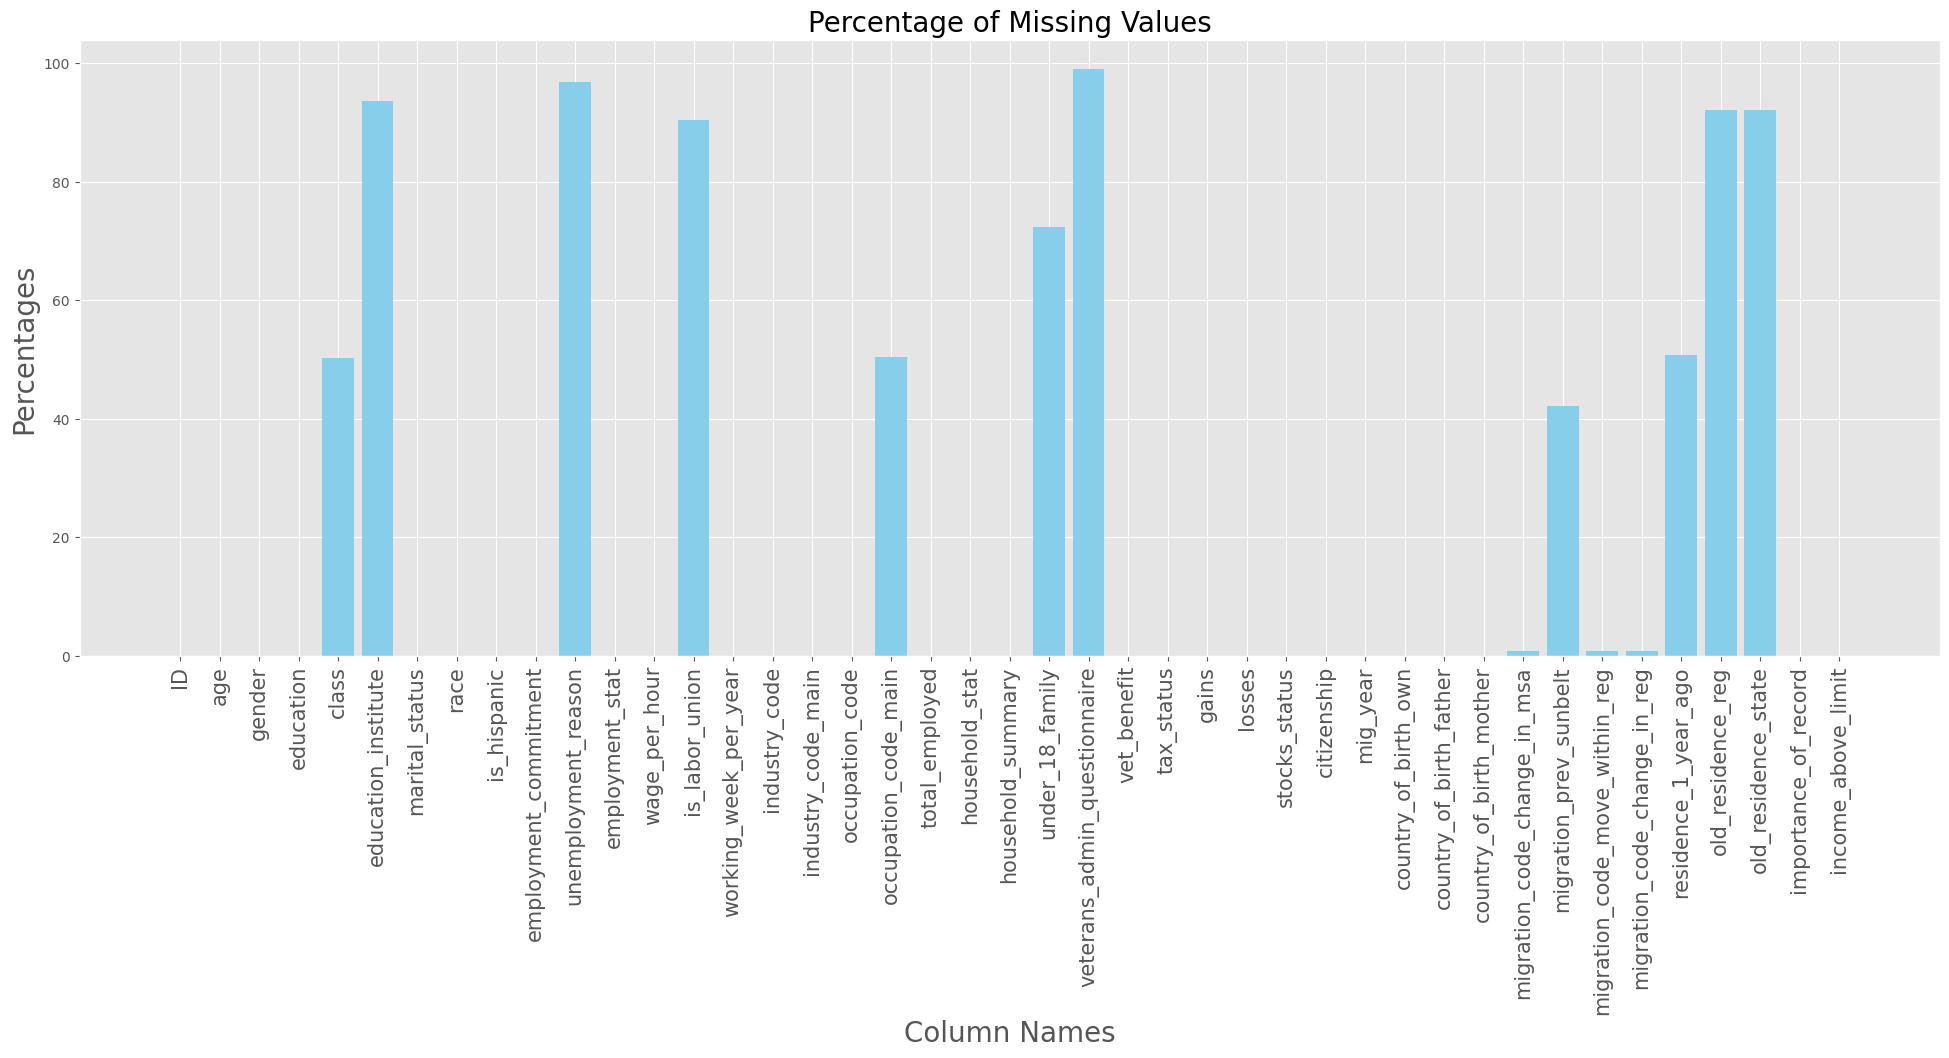

In [15]:
from matplotlib import pyplot as plt 
#Show the percentage of missing values
column_names = train_df.isnull().sum().index
percentage_of_missinginfo = train_df.isnull().sum().values/train_df.shape[0] * 100

with plt.style.context("ggplot"):
    
    plt.figure(figsize=(24,8))
    
    plt.bar(np.arange(len(column_names)),percentage_of_missinginfo,color="skyblue")
    plt.xticks(np.arange(len(column_names)),column_names,rotation=90,fontsize=15)
    plt.xlabel("Column Names",fontsize=20)
    plt.ylabel("Percentages",fontsize=20)
    plt.title("Percentage of Missing Values",fontsize=20)
    plt.show()

In [16]:
#Check for columns with alot of missing values
columns_to_remove = []
for column in train_df.columns:
    
    rate_missing_info = train_df[column].isnull().sum()/train_df.shape[0] * 100
    
    if rate_missing_info > 40:
        columns_to_remove.append(column)

print("Column with more 40% missing info: \n",columns_to_remove)

Column with more 40% missing info: 
 ['class', 'education_institute', 'unemployment_reason', 'is_labor_union', 'occupation_code_main', 'under_18_family', 'veterans_admin_questionnaire', 'migration_prev_sunbelt', 'residence_1_year_ago', 'old_residence_reg', 'old_residence_state']


In [ ]:
# Check the value count of the 'class' column
income_counts = train_df['income_above_limit'].value_counts()
print(income_counts)

income_above_limit
Below limit    196501
Above limit     12998
Name: count, dtype: int64


In [ ]:
# Check the value count of the 'class' column
class_counts = train_df['class'].value_counts()
print(class_counts)

class
Private                           75617
Self-employed-not incorporated     8957
Local government                   8093
State government                   4480
Self-employed-incorporated         3444
Federal government                 3047
Never worked                        449
Without pay                         167
Name: count, dtype: int64
